In [8]:
import biosignalsnotebooks as bsnb

#data, header = bsnb.load("Sensor data/ECG.h5", get_header=True)

samplingRate = header["sampling rate"]
list(data.keys())

['CH1']

In [82]:
import biosignalsnotebooks as bsnb

data, header = bsnb.load("Sensor data/ECG.h5", get_header=True)

samplingRate = header["sampling rate"]
channel = list(data.keys())[1]

signal = data[channel]

time = bsnb.generate_time(signal)

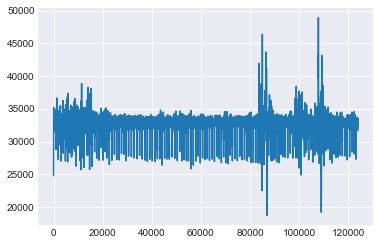

In [92]:
%matplotlib inline
# So you have to explicitely import the module into the namespace
import matplotlib.pyplot as plt
plt.plot(signal)

In [84]:
## OpenSignalsTools

peaks_opensignal = bsnb.detect_r_peaks(signal, samplingRate, time_units=True, plot_result=True)

In [17]:
import numpy

intervals = [peaks_opensignal[0][i] - peaks_opensignal[0][i-1] for i in range(1,len(peaks_opensignal[0]))]
rr_intervals = (numpy.array(intervals) * 1000).astype(int)

In [29]:
## Aura-healthcare package
from hrvanalysis import get_time_domain_features, get_frequency_domain_features, get_geometrical_features, get_csi_cvi_features, get_poincare_plot_features

time_features = get_time_domain_features(rr_intervals)
freq_features = get_frequency_domain_features(rr_intervals)
poincare_features = get_poincare_plot_features(rr_intervals)
geom_features = get_geometrical_features(rr_intervals)
cvi_features = get_csi_cvi_features(rr_intervals)

print(time_features)
print(freq_features)
print(poincare_features)
print(geom_features)
print(cvi_features)

{'mean_nni': 736.6923076923077, 'sdnn': 38.60998276651738, 'sdsd': 23.30772404161333, 'nni_50': 0, 'pnni_50': 0.0, 'nni_20': 6, 'pnni_20': 46.15384615384615, 'rmssd': 23.313086453749534, 'median_nni': 734.0, 'range_nni': 115, 'cvsd': 0.03164562220932901, 'cvnni': 0.05240991708935219, 'mean_hr': 81.65254943264593, 'max_hr': 87.71929824561404, 'min_hr': 75.09386733416771, 'std_hr': 4.122305935509435}
{'lf': 803.2976194492612, 'hf': 342.0085741986816, 'lf_hf_ratio': 2.3487645633778906, 'lfnu': 70.13824110133015, 'hfnu': 29.861758898669855, 'total_power': 1404.4043768871252, 'vlf': 259.09818323918233}
{'sd1': 17.213895021702143, 'sd2': 51.818368911452204, 'ratio_sd2_sd1': 3.0102640248545156}
{'triangular_index': 4.333333333333333, 'tinn': None}
{'csi': 3.0102640248545156, 'cvi': 4.154482871327796, 'Modified_csi': 623.9478870431368}


/Users/annkatrin/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 256 is greater than input length  = 62, using nperseg = 62
  .format(nperseg, input_length))


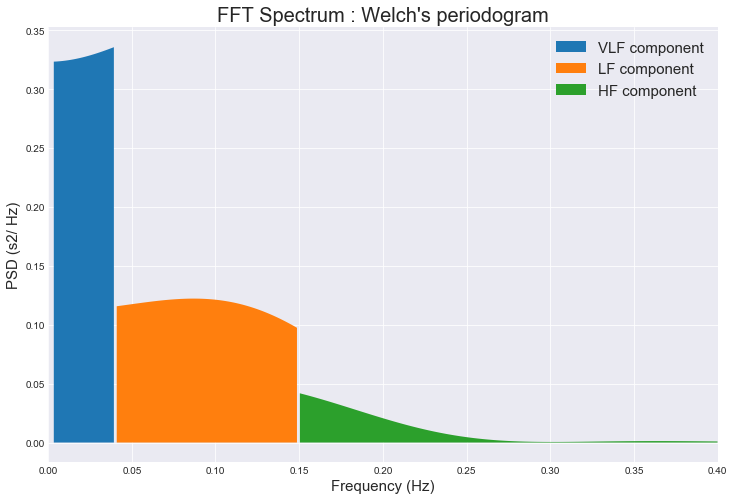

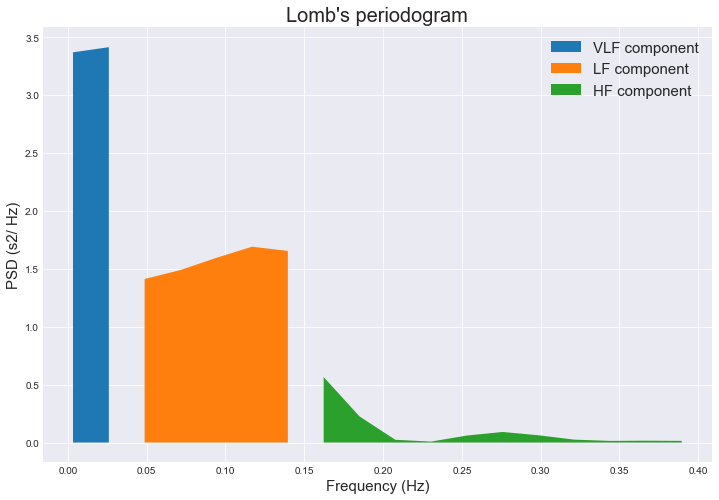

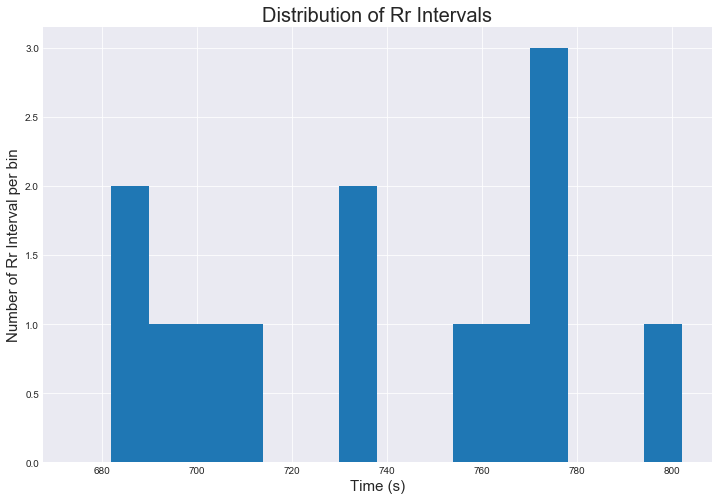

In [22]:
from hrvanalysis import plot_psd
from hrvanalysis import plot_distrib

plot_psd(rr_intervals, method="welch")
plot_psd(rr_intervals, method="lomb")
plot_distrib(rr_intervals)

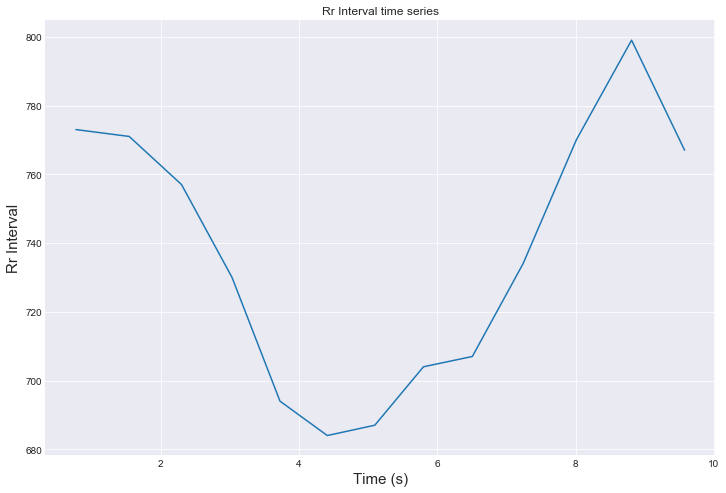

In [27]:
from hrvanalysis import plot_timeseries

plot_timeseries(rr_intervals)

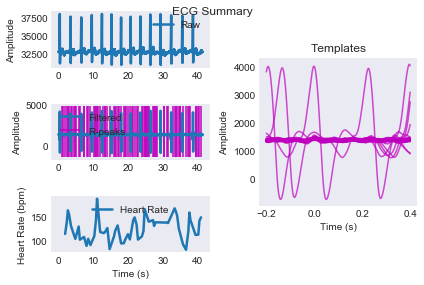

In [30]:
## PyHRV package
from biosppy.signals.ecg import ecg

filtered_signal, rpeaks = ecg(signal)[1:3]

/Users/annkatrin/opt/anaconda3/lib/python3.7/site-packages/pyhrv/utils.py:368: UserWarning: Signal duration is to short for segmentation into 300000s. Input data will be returned.
  warnings.warn("Signal duration is to short for segmentation into %is. Input data will be returned." % duration)
/Users/annkatrin/opt/anaconda3/lib/python3.7/site-packages/pyhrv/time_domain.py:303: UserWarning: Signal duration too short for SDANN computation.
  warnings.warn("Signal duration too short for SDANN computation.")
/Users/annkatrin/opt/anaconda3/lib/python3.7/site-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '
/Users/annkatrin/opt/anaconda3/lib/python3.7/site-packages/pyhrv/utils.py:36

NameError: name 'ecg' is not defined

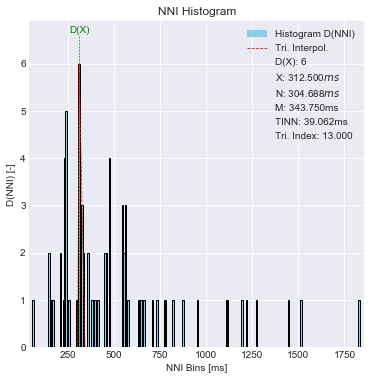

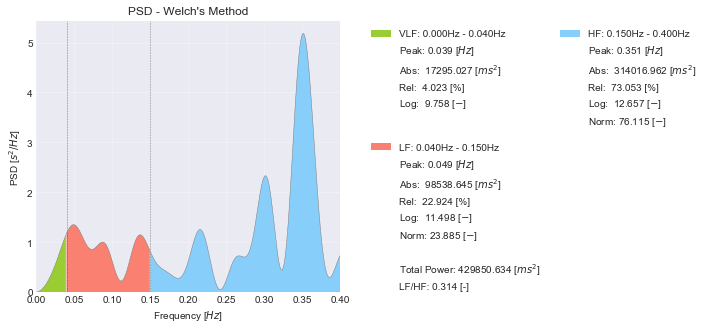

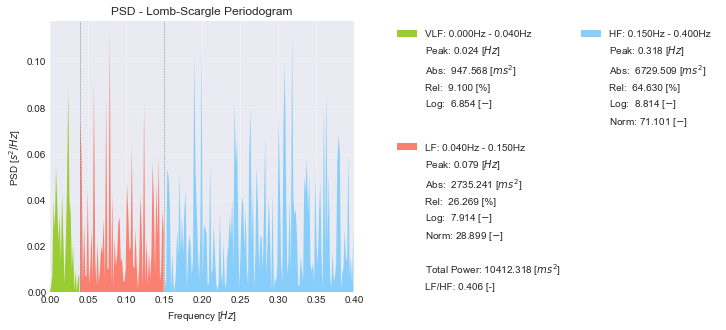

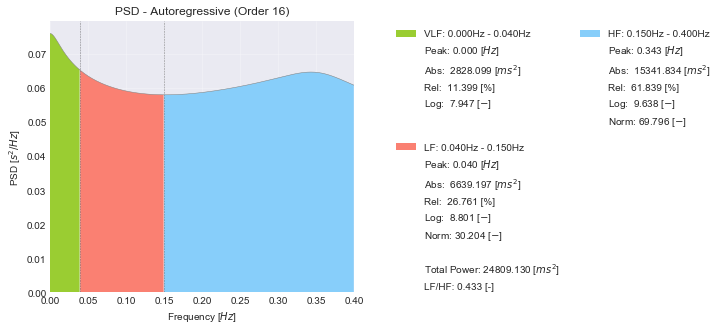

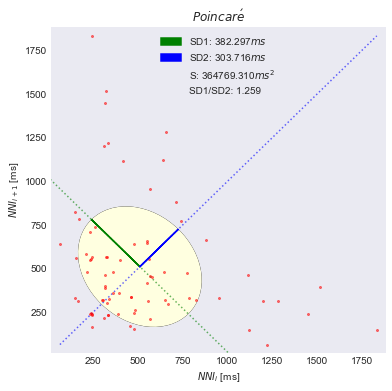

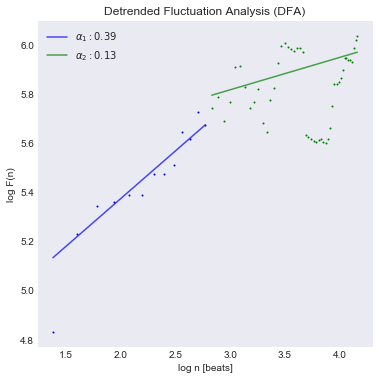

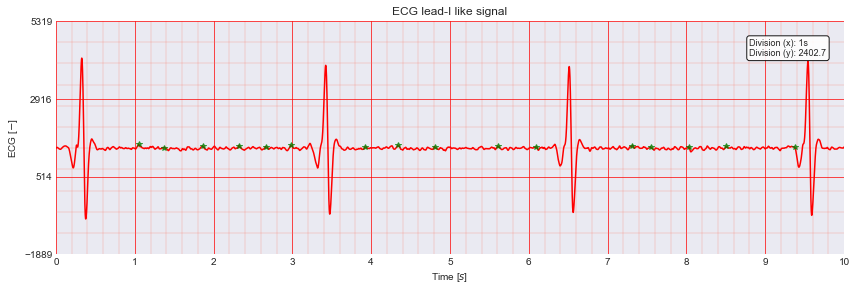

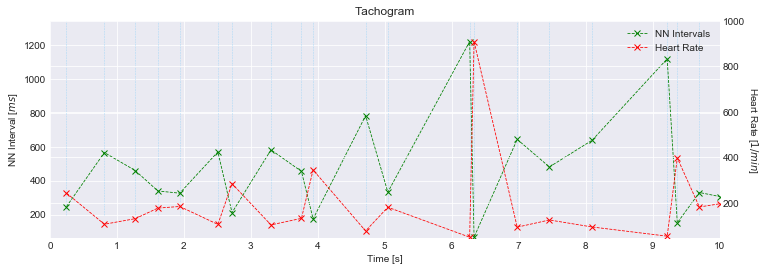

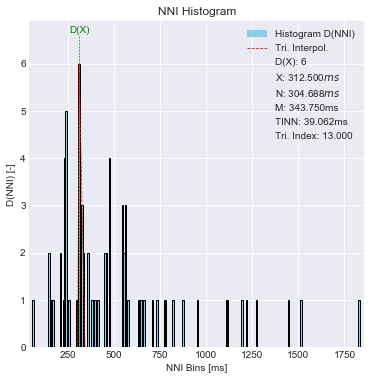

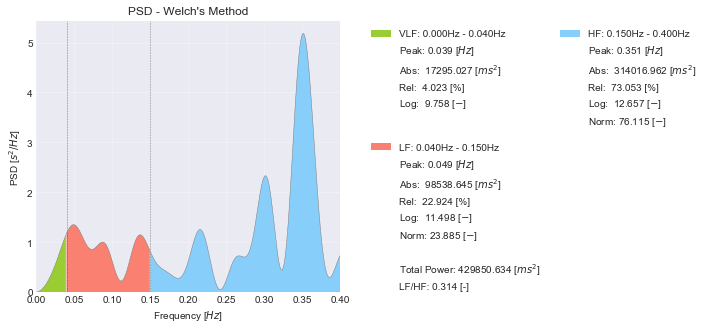

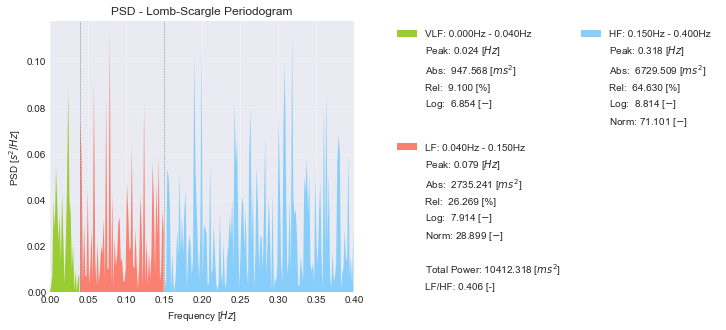

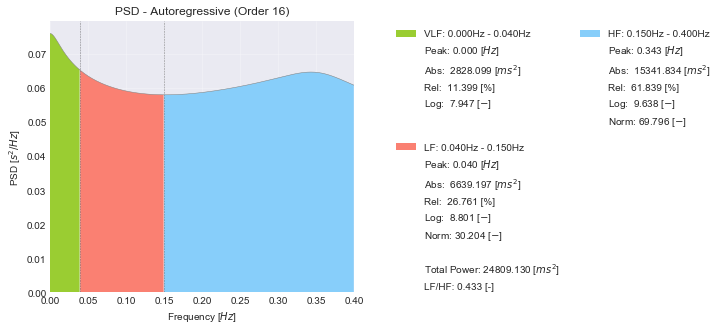

In [33]:
import pyhrv

results_hrv = pyhrv.hrv(signal=signal)
results_time = pyhrv.time_domain.time_domain(signal=signal)
results_freq = pyhrv.frequency_domain.frequency_domain(signal=signal)

In [36]:
print(results_hrv)
print(results_time)
print(results_freq)

ReturnTuple(nni_counter=78, nni_mean=511.87179487179486, nni_min=66.0, nni_max=1833.0, hr_mean=170.9185709665636, hr_min=32.733224222585925, hr_max=909.0909090909091, hr_std=121.18827216278237, nni_diff_mean=378.6623376623377, nni_diff_min=0, nni_diff_max=1684, sdnn=345.9389015559302, sdnn_index=nan, sdann=nan, rmssd=540.6568996294073, sdsd=388.43822276520336, nn50=65, pnn50=84.4155844155844, nn20=68, pnn20=88.31168831168831, nni_histogram=<Figure size 432x432 with 1 Axes>, tinn_n=304.6875, tinn_m=343.75, tinn=39.0625, tri_index=13.0, fft_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), fft_peak=(0.0390625, 0.048828125, 0.3505859375), fft_abs=(17295.026739946297, 98538.64454696399, 314016.9623535322), fft_rel=(4.02349685830941, 22.923926786481996, 73.05257635520859), fft_log=(9.758174267478562, 11.498204080644753, 12.657202283665528), fft_norm=(23.88493645433121, 76.11506354566879), fft_ratio=0.3138003877511096, fft_total=429850.6336404425, fft_plot=<Figur

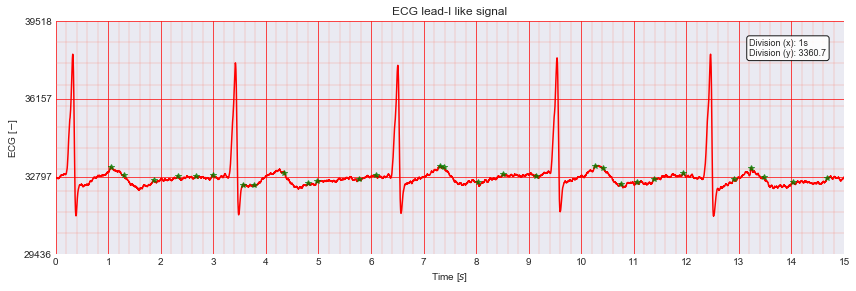

ReturnTuple(ecg_plot=<Figure size 864x288 with 1 Axes>)

In [37]:
import biosppy
import numpy as np
import pyhrv.tools as tools

nni = tools.nn_intervals(rpeaks)
tools.plot_ecg(signal, interval=[0, 15])

In [38]:
rpeaks

array([ 1049,  1296,  1862,  2322,  2661,  2987,  3557,  3768,  4350,
        4805,  4979,  5763,  6095,  7317,  7383,  8027,  8508,  9147,
       10267, 10418, 10748, 11054, 11375, 11944, 12899, 13233, 13469,
       14021, 14678, 15959, 16273, 16491, 16974, 17236, 17977, 18752,
       19230, 19387, 19947, 20501, 21151, 21470, 21871, 22421, 22838,
       23955, 24419, 24755, 24988, 25228, 25472, 25637, 25951, 27152,
       27470, 27858, 28101, 28344, 30177, 30326, 31151, 31472, 32991,
       33387, 33749, 34109, 34589, 34834, 35069, 35780, 36660, 37326,
       37626, 37946, 39394, 39636, 40193, 40511, 40975])

In [41]:
peaks_opensignal

(array([0.08200198, 0.85577067, 1.62753931, 2.3848076 , 3.11507524,
        3.80909201, 4.49360854, 5.18112515, 5.88589217, 6.59365927,
        7.327927  , 8.0979456 , 8.89721491, 9.66498345]),
 array([38032, 37666, 37598, 37914, 38078, 38000, 37582, 37665, 37722,
        38000, 38016, 37808, 37804, 37884], dtype=uint16))

In [42]:
test_signal = pyhrv.utils.load_sample_nni()

In [47]:
r_peaks = biosppy.signals.ecg.christov_segmenter(signal=signal, sampling_rate=samplingRate)

In [48]:
r_peaks

ReturnTuple(rpeaks=array([  324,  3419,  6510,  9540, 12460, 15239, 17973, 20723, 23542,
       26373, 29308, 32387, 35585, 38656]))

In [49]:
peaks_opensignal

(array([0.08200198, 0.85577067, 1.62753931, 2.3848076 , 3.11507524,
        3.80909201, 4.49360854, 5.18112515, 5.88589217, 6.59365927,
        7.327927  , 8.0979456 , 8.89721491, 9.66498345]),
 array([38032, 37666, 37598, 37914, 38078, 38000, 37582, 37665, 37722,
        38000, 38016, 37808, 37804, 37884], dtype=uint16))

In [51]:
corrected_peaks = biosppy.signals.ecg.correct_rpeaks(signal=signal, rpeaks=r_peaks)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [55]:
len(time)

41400

In [56]:
from ecgdetectors import Detectors
detectors = Detectors(samplingRate)

In [60]:
r_peaks2 = detectors.christov_detector(signal)
r_peaks2

[1696,
 2497,
 3298,
 4791,
 5592,
 6393,
 7864,
 8665,
 9466,
 10907,
 11708,
 12509,
 13847,
 14648,
 15449,
 16629,
 17430,
 18231,
 19337,
 20138,
 20939,
 22022,
 22823,
 23624,
 24425,
 25226,
 26027,
 26828,
 27676,
 28477,
 29278,
 30557,
 31358,
 32159,
 33611,
 34412,
 35213,
 36014,
 36815,
 37616,
 38417,
 39218,
 40019,
 40820]

In [59]:
r_peaks1 = detectors.hamilton_detector(signal)
r_peaks1

[1552,
 3009,
 4938,
 6625,
 9550,
 12471,
 15249,
 18086,
 20734,
 23656,
 26487,
 29320,
 32630,
 35828,
 38668]

In [63]:
r_peaks4 = detectors.pan_tompkins_detector(signal)
r_peaks4

[3013,
 6345,
 9317,
 12587,
 15252,
 18098,
 20738,
 23557,
 26499,
 29438,
 32403,
 35600,
 38788]

In [65]:
r_peaks6 = detectors.two_average_detector(signal)
r_peaks6

[3678,
 6767,
 9796,
 12718,
 15494,
 18228,
 20979,
 23799,
 26630,
 29565,
 32646,
 35843,
 38913]

In [64]:
r_peaks5 = detectors.swt_detector(signal)
r_peaks5

[1260, 3612]

In [61]:
r_peaks3 = detectors.engzee_detector(signal)
r_peaks3

[9540, 15239, 17973, 23542, 26373, 29308, 32387]

In [71]:
from hrv import HRV

hrv_features = HRV(samplingRate)

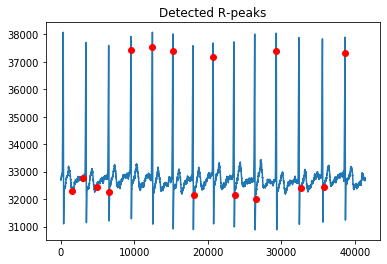

In [3]:
import matplotlib.pyplot as plt
import biosignalsnotebooks as bsnb
from ecgdetectors import Detectors

data, header = bsnb.load_signal("ecg_4000_Hz", get_header=True)
channel = list(data.keys())[0]
sr = header["sampling rate"]
signal = data[channel]

detectors = Detectors(sr)
r_peaks1 = detectors.hamilton_detector(signal)


plt.figure()
plt.plot(signal)
plt.plot(r_peaks1, signal[r_peaks1], 'ro')
plt.title('Detected R-peaks')

plt.show()

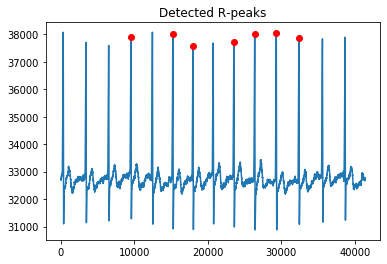

In [4]:
r_peaks3 = detectors.engzee_detector(signal)

plt.figure()
plt.plot(signal)
plt.plot(r_peaks3, signal[r_peaks3], 'ro')
plt.title('Detected R-peaks')

plt.show()

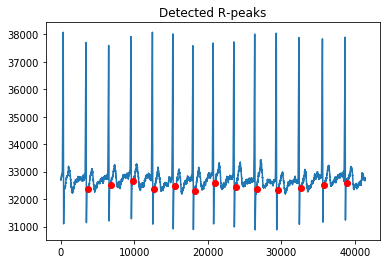

In [5]:
r_peaks6 = detectors.two_average_detector(signal)

plt.figure()
plt.plot(signal)
plt.plot(r_peaks6, signal[r_peaks6], 'ro')
plt.title('Detected R-peaks')

plt.show()

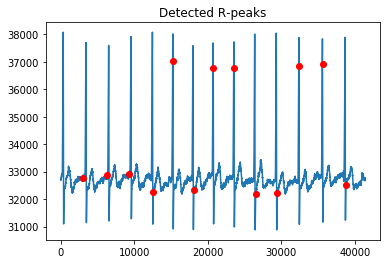

In [6]:
r_peaks4 = detectors.pan_tompkins_detector(signal)

plt.figure()
plt.plot(signal)
plt.plot(r_peaks4, signal[r_peaks4], 'ro')
plt.title('Detected R-peaks')

plt.show()

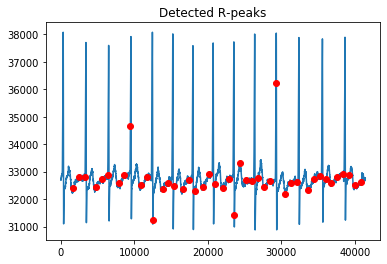

In [7]:
r_peaks2 = detectors.christov_detector(signal)

plt.figure()
plt.plot(signal)
plt.plot(r_peaks2, signal[r_peaks2], 'ro')
plt.title('Detected R-peaks')

plt.show()

## Different Dataset

In [10]:
import numpy as np

unfiltered_ecg_dat = np.loadtxt("Sensor data/ECG.tsv") 
unfiltered_ecg = unfiltered_ecg_dat[:, 0]
fs = 250

In [17]:
datContent = np.fromfile("Sensor data/100.dat", dtype=int)


In [18]:
datContent

array([ 3739099519840891875, -2021214753628363789,  -922142864993684685,
       ...,  3768305850112423091,  8768002319577248154,
          18859636050868019])

In [22]:
import wfdb

sig, fields = wfdb.rdsamp("Sensor data/100")
unfiltered_ecg = sig[:, 0]  

In [27]:
fields

{'fs': 360,
 'sig_len': 650000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V5'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}